In [89]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

In [90]:
tests = [1,2,3,4,5,6,7,8]

In [91]:
def get_points(test_number):
  points_path = {
    'base': f'data/test{test_number}a.csv',
    'transformed': f'data/test{test_number}b.csv'
  }


  points = {}

  for key, value in points_path.items():
    points[key] = {}
    points[key]['points'] = np.loadtxt(value, delimiter=',', skiprows=1)


  return points

In [92]:
def filter_noise(points, epsilon, min_samples):
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    labels = dbscan.fit_predict(points)
    
    # Keep only core & border points (ignore noise points labeled as -1)
    filtered_points = points[labels != -1]
    return filtered_points

In [93]:
def plot(points, test_number):
  fig, axes = plt.subplots(1, 2, figsize=(2 * 6, 6))

  input_keys = {'base': 'green', 'transformed': 'blue'}

  for key, value in input_keys.items():
    input_points = points[key]['points']
    axes[0].scatter(input_points[:, 0], input_points[:, 1], linestyle='-', marker='o', color=value, s=1, label=key)

    filtered = filter_noise(input_points, 100, 4)
    axes[1].scatter(filtered[:, 0], filtered[:, 1], linestyle='-', marker='o', color=value, s=1, label=key)

  for ax in axes:
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    ax.grid(True)


  handles, labels = axes[0].get_legend_handles_labels()

  fig.legend(handles, labels)

  plt.suptitle(f'Test #{test_number}')
  plt.show()

In [94]:
def check_dbscan(test_number):
  plot(get_points(test_number), test_number)

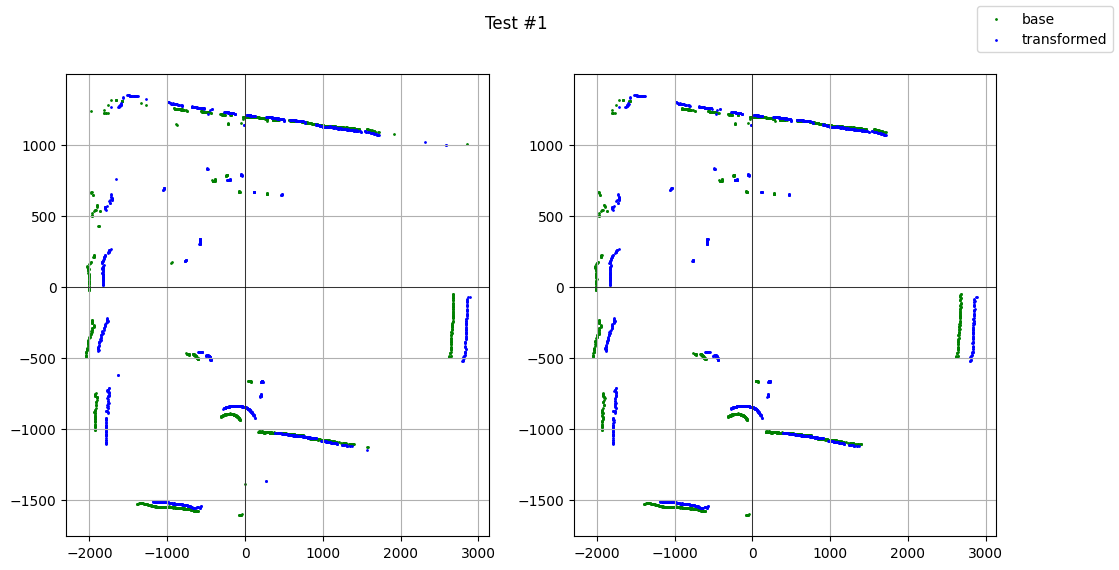

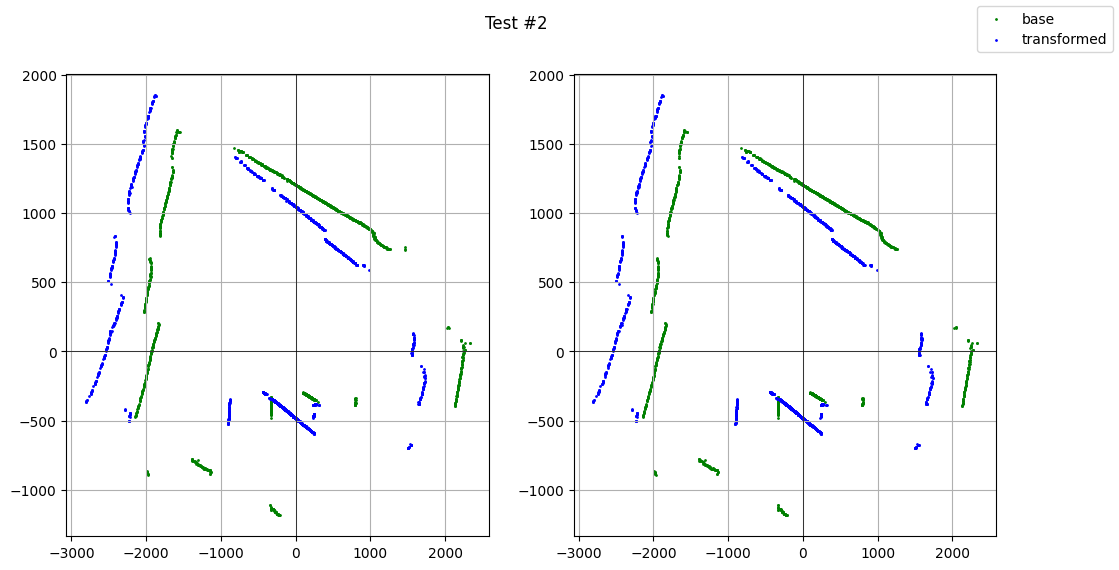

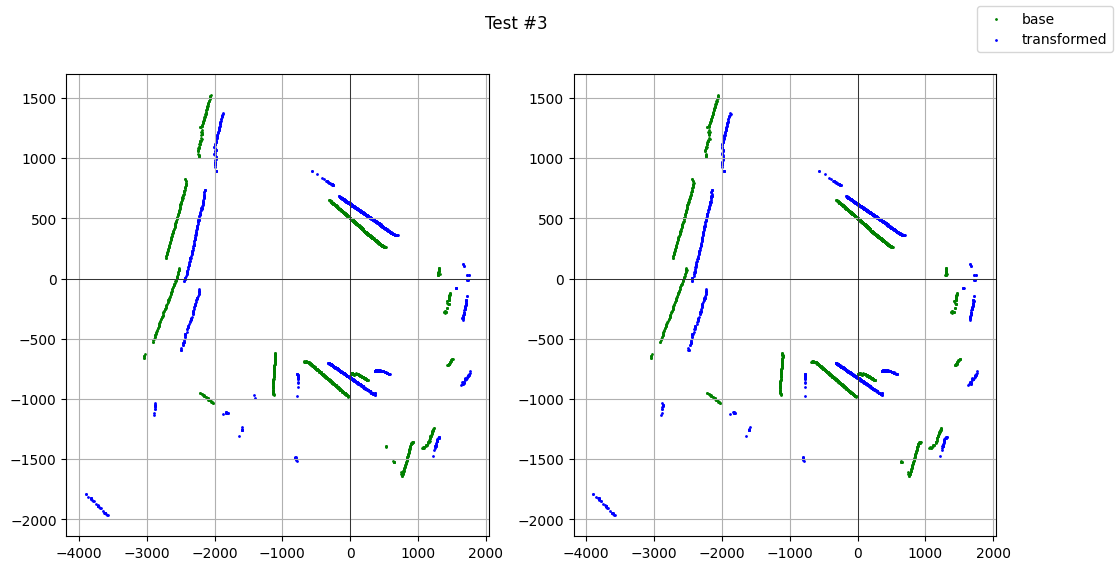

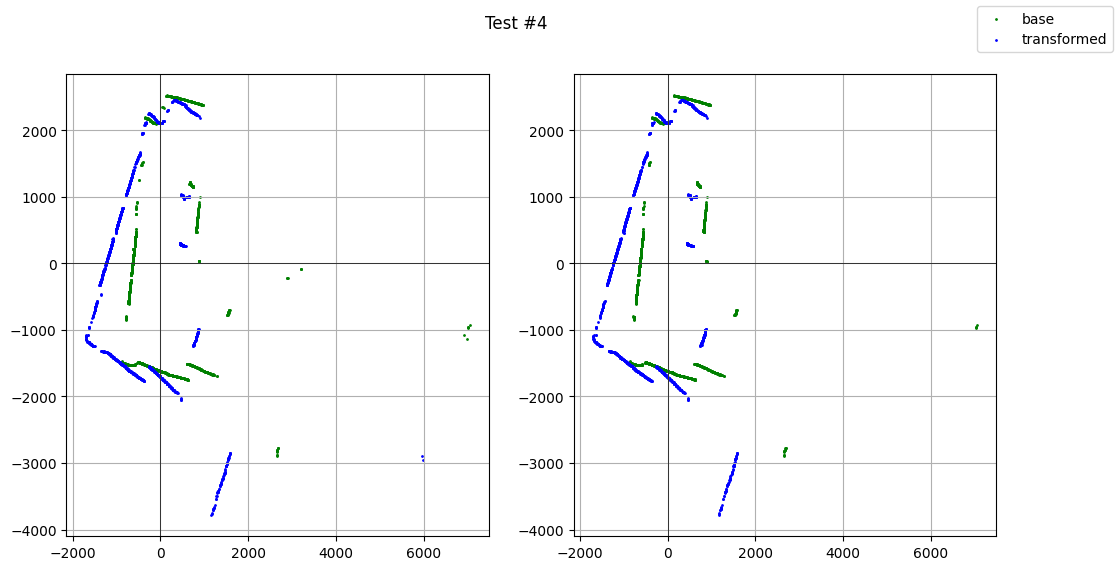

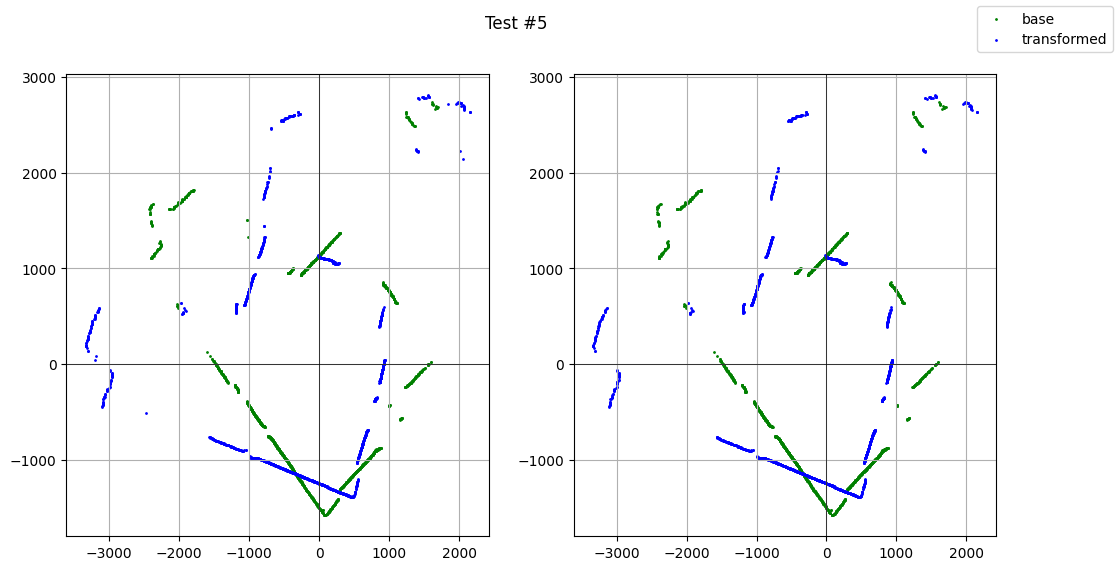

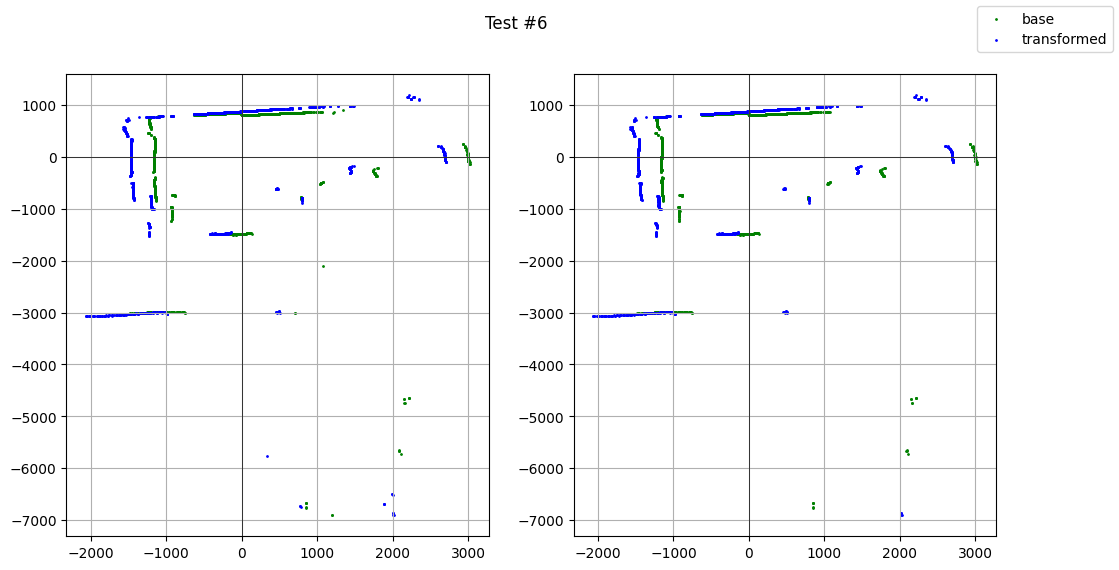

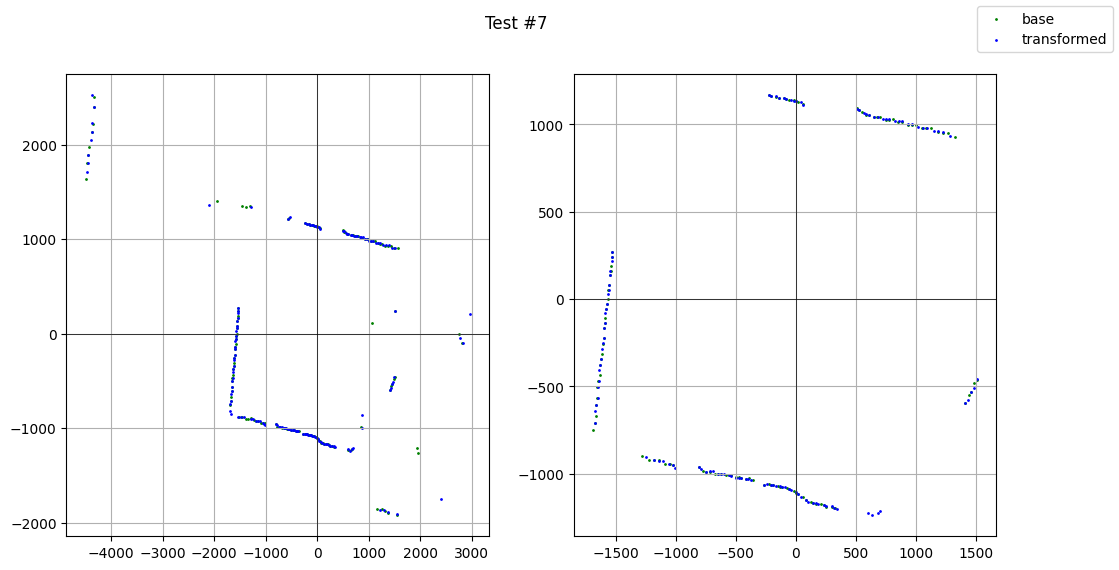

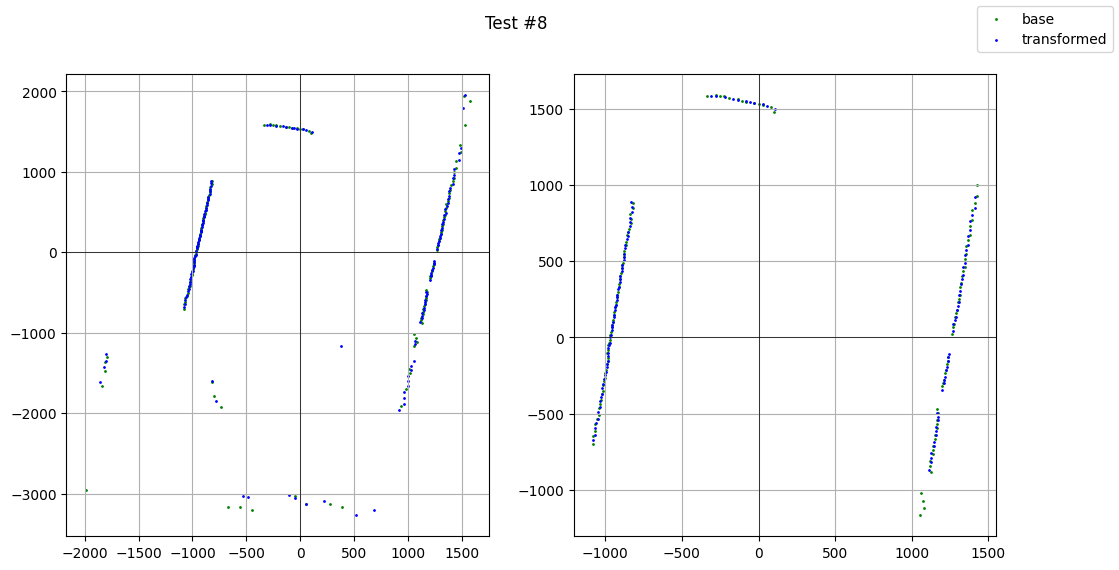

In [95]:
for test in tests:
  check_dbscan(test)